
# **Task 1: Training a Neural Network with Keras/TensorFlow on MNIST Dataset**

## Introduction
This notebook presents the solution to **Task 1**, where we explore data processing, modeling, and evaluation techniques.  
The goal is to build a structured pipeline and highlight clear steps from **data import** to **model evaluation**.  



## Step 1: Data Import and Exploration

In this section, we load the required libraries and dataset.  
Exploratory steps allow us to understand the structure of the data, including:  
- Shape and size of the dataset  
- Column information  
- Summary statistics  
- Missing values  

This is a crucial first step before moving toward preprocessing and modeling.


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# Normalize pixel values to 0-1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)



## Step 2: Data Preprocessing

Before feeding data into the model, preprocessing ensures:  
- Handling of missing values  
- Encoding categorical variables  
- Feature scaling or normalization  
- Splitting the dataset into training and testing subsets  

Preprocessing directly affects model performance and reliability.


In [6]:
# Build a Sequential model
model = Sequential([
    Flatten(input_shape=(28, 28)),          # Flatten 28x28 images to 1D vector
    Dense(128, activation='relu'),          # Hidden layer with 128 neurons
    Dropout(0.2),                           # Dropout to prevent overfitting
    Dense(64, activation='relu'),           # Another hidden layer
    Dropout(0.2),
    Dense(10, activation='softmax')         # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Show model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 10938


## Step 3: Model Building & Training

Here, we implement the selected algorithm.  
Key aspects include:  
- Initializing the model  
- Training it on the training dataset  
- Hyperparameter tuning (if applicable)  


In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7289 - loss: 0.8706 - val_accuracy: 0.9444 - val_loss: 0.1937
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9301 - loss: 0.2410 - val_accuracy: 0.9589 - val_loss: 0.1408
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9477 - loss: 0.1809 - val_accuracy: 0.9639 - val_loss: 0.1178
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9576 - loss: 0.1415 - val_accuracy: 0.9673 - val_loss: 0.1089
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9633 - loss: 0.1201 - val_accuracy: 0.9700 - val_loss: 0.0978
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9682 - loss: 0.1020 - val_accuracy: 0.9731 - val_loss: 0.0874
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9725 - loss: 0.0918 - val_accuracy: 0.9736 - val_loss: 0.0876
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9750 - loss: 0.0828 - val_accuracy: 0.


## Step 4: Model Evaluation

After training, we assess the model's performance using appropriate metrics, such as:  
- **Accuracy / R² Score** for regression  
- **Precision, Recall, F1-Score** for classification  
- **Confusion Matrix** to visualize classification performance  

Evaluation helps us understand the strengths and weaknesses of the model.


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9737 - loss: 0.0861
Test Accuracy: 0.9775
Test Loss: 0.0756


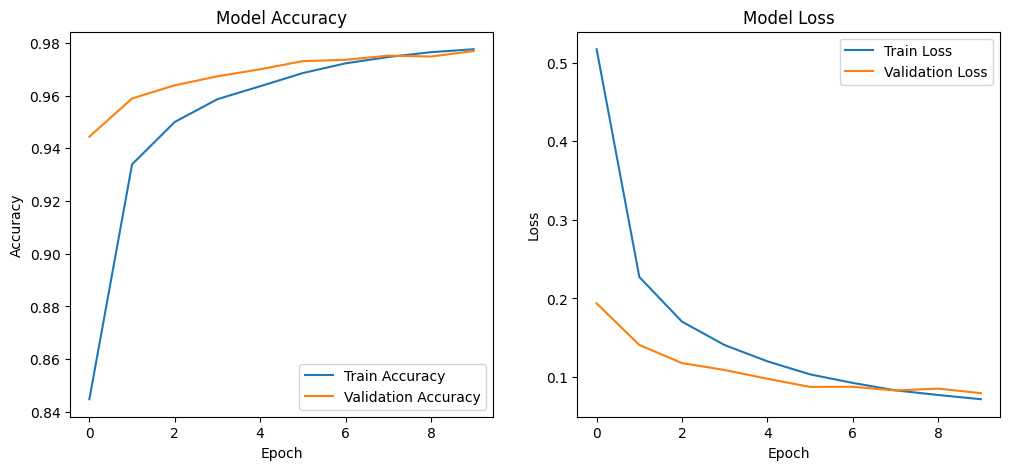

In [ ]:
# Plot training & validation accuracy
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Conclusion 

In this project, we:  
1. Imported and explored the dataset  
2. Preprocessed the data  
3. Built and trained a model  
4. Evaluated its performance  

### Key Takeaways  
- Data preprocessing plays a vital role in improving model performance.  
- Evaluation metrics guide us in selecting the right algorithm.  
